# Principal Component Analysis

In [3]:
import tdb
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [48]:
lid = [132443,
 271491,
 347074,
 347381,
 385018,
 396168,
 453703,
 520559,
 585194,
 648426,
 772512,
 774573,
 875424,
 914869]

# 14 random loci
lid = [331004,
 506482,
 769251,
 686135,
 786222,
 536463,
 89523,
 536567,
 588878,
 215410,
 124442,
 439869,
 434023,
 648677]

# 14 MAF loci
x_lid = [49102, 55932, 58093, 169806, 204905, 215209, 341872, 522383, 527961, 575977, 627972, 652360, 872025, 875958]


In [49]:
lid = [132443, 271491, 347074, 347381, 385018, 396168, 453703, 520559,
 585194, 648426, 772512, 774573, 875424, 914869]


data = tdb.load_tdb("/Users/english/code/references/hprc_105.tdb",
                    lfilters=[('LocusID', 'in', lid)])

In [50]:
alleles = data['allele'].set_index(['LocusID', 'allele_number'])[[]]

In [51]:
all_lengths = []
for i, sample in enumerate(data['sample']):
    m_samp = data['sample'][sample]
    m_samp = m_samp[m_samp['spanning_reads'] >= 10].set_index(['LocusID', 'allele_number'])
    alleles[sample] = alleles.index.isin(m_samp.index).astype(int)
    # de-fragment the frame every once in a while
    if i % 50 == 0:
        alleles = alleles.copy()

alleles = alleles.fillna(0)

In [52]:
keep = alleles.mean(axis=1) < 1000
len(keep), keep.sum()

(200, 200)

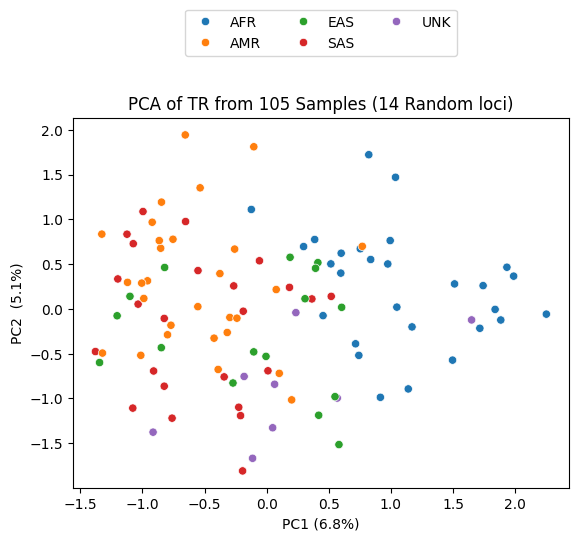

In [53]:
pca = PCA(n_components=2)
values = alleles[keep].values.T
X_r = pca.fit(values).transform(values)

m_X = pd.DataFrame(X_r, columns=["PC1", "PC2"])
m_X['sample'] = alleles.columns

# Add Population information for the plot
meta = pd.read_csv("/Users/english/code/references/hprc_105.tdb/igsr_samples.tsv", sep='\t')
slookup = dict(zip(meta["Sample name"], meta["Superpopulation code"]))

m_X['Super Pop'] = m_X['sample'].map(slookup).fillna('UNK')

pc1, pc2 = pca.explained_variance_ratio_
pc1 = round(pc1*100, 1)
pc2 = round(pc2*100, 1)

order = sorted(m_X['Super Pop'].unique())
p = sb.scatterplot(data=m_X, x="PC1", y="PC2", hue="Super Pop",
                   hue_order=order)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.15), ncol=3)
_ = p.set(title=f"PCA of TR from {len(data['sample'])} Samples ({len(lid)} Random loci)",
         xlabel=f"PC1 ({pc1}%)", ylabel=f"PC2  ({pc2}%)")
plt.savefig("PCA_RandomLoci.1.png")